# Introduction

In this lab, we will be using cross-validation with linear models. We will be using the diabetes dataset and applying GridSearchCV to find the best alpha value for Lasso regression. We will then plot the errors and use LassoCV to see how much we can trust the selection of alpha.

# Load and prepare the dataset

First, we will load and prepare the diabetes dataset. We will only use the first 150 samples for this exercise.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

# Apply GridSearchCV

Next, we will apply GridSearchCV to find the best alpha value for Lasso regression. We will use a range of alpha values from 10^-4 to 10^-0.5 with 30 values in between. We will use 5 folds for cross-validation.

In [2]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             refit=False)

# Plot the errors

We will now plot the errors to see the best alpha value. We will plot the mean test scores and the standard errors of the scores.

(0.0001, 0.31622776601683794)

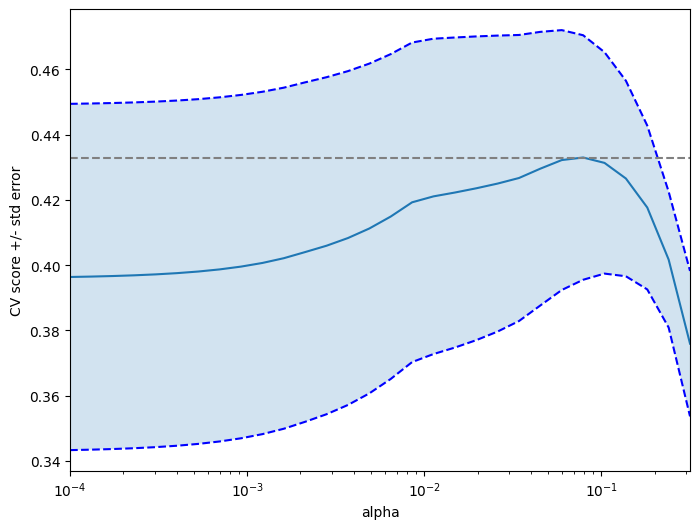

In [3]:
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

# Use LassoCV to check alpha selection

Finally, we will use LassoCV to see how much we can trust the selection of alpha. We will use KFold with 3 folds.

In [4]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print(
        "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
            k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])
        )
    )

print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15521
[fold 2] alpha: 0.07880, score: 0.45192

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


# Summary

In this lab, we learned how to use cross-validation with linear models. We used GridSearchCV to find the best alpha value for Lasso regression and plotted the errors to visualize the selection. We also used LassoCV to check the selection of alpha.